In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
#!pip install pandas pyarrow
import pyarrow



import pyarrow.parquet as pq

movies = pq.read_table(source="../data/raw/df_90000_99999.parquet.gzip").to_pandas()
movies


,adult,id,original_title,popularity,video,url,poster_url,genre_id
90000,False,141601,Planetfall,1.465,False,https://www.themoviedb.org/movie/141601,None,[]
90001,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,[28]
90002,False,141604,Hasten Slowly: The Journey of Sir Laurens van ...,0.600,False,https://www.themoviedb.org/movie/141604,None,[99]
90003,False,141605,Murder Was the Case: The Movie,1.224,False,https://www.themoviedb.org/movie/141605,https://www.themoviedb.org/t/p/w500//cKEuVikXQ...,"[10402, 99]"
90004,False,141607,Parade of the Dead,1.045,False,https://www.themoviedb.org/movie/141607,https://www.themoviedb.org/t/p/w500//lhnrm3scq...,[10402]
...,...,...,...,...,...,...,...,...
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,"[28, 18]"
99996,False,162787,The Second Death,1.331,False,https://www.themoviedb.org/movie/162787,None,[]
99997,False,162788,The Phantom of the Air,1.487,False,https://www.themoviedb.org/movie/162788,https://www.themoviedb.org/t/p/w500//leCNbE3R1...,[28]
99998,False,162791,The Gorilla Mystery,2.032,False,https://www.themoviedb.org/movie/162791,https://www.themoviedb.org/t/p/w500//mfhxTfeXJ...,[16]


In [521]:
### Check null values

movies.isnull().sum()

# there are movies without gender 
movies = movies.drop(movies[movies['genre_id']=='[]'].index)

movies[movies['genre_id']=='[]']

# The list is a list of integers  , reason why a I made this function .

map_gender={"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":	"History",
"27":"Horror",
"10402"	:"Music",
"9648":"Mystery",
"10749":"Romance",
"878"	:"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War",
"37":"Western" }

def map_multiclass(x):
  
  tmp=[]  
  

  for y in x.split(","):
   
    y=y.replace('[', '') 
    y=y.replace(']', '') 
    y=y.replace(' ', '') 
 
    if y in map_gender:
     tmp.append(map_gender[y])
 


  return [','.join(tmp)]


movies['genre_ids2']=movies['genre_id'].apply(lambda x: map_multiclass(x))
movies













,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2
90001,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,[28],[Action]
90002,False,141604,Hasten Slowly: The Journey of Sir Laurens van ...,0.600,False,https://www.themoviedb.org/movie/141604,None,[99],[Documentary]
90003,False,141605,Murder Was the Case: The Movie,1.224,False,https://www.themoviedb.org/movie/141605,https://www.themoviedb.org/t/p/w500//cKEuVikXQ...,"[10402, 99]","[Music,Documentary]"
90004,False,141607,Parade of the Dead,1.045,False,https://www.themoviedb.org/movie/141607,https://www.themoviedb.org/t/p/w500//lhnrm3scq...,[10402],[Music]
90005,False,141610,Classic Albums: Peter Gabriel - So,3.658,False,https://www.themoviedb.org/movie/141610,https://www.themoviedb.org/t/p/w500//kwNfpafUf...,"[10402, 99]","[Music,Documentary]"
...,...,...,...,...,...,...,...,...,...
99994,False,162784,Les pigeons du square,2.198,False,https://www.themoviedb.org/movie/162784,https://www.themoviedb.org/t/p/w500//dbqpuPUAy...,[99],[Documentary]
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,"[28, 18]","[Action,Drama]"
99997,False,162788,The Phantom of the Air,1.487,False,https://www.themoviedb.org/movie/162788,https://www.themoviedb.org/t/p/w500//leCNbE3R1...,[28],[Action]
99998,False,162791,The Gorilla Mystery,2.032,False,https://www.themoviedb.org/movie/162791,https://www.themoviedb.org/t/p/w500//mfhxTfeXJ...,[16],[Animation]


<AxesSubplot:xlabel='Multiclass'>

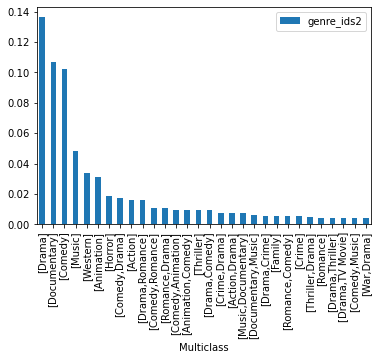

In [522]:

## Dist of genders

## Toop 30 multiclasses

top30=pd.DataFrame(movies.genre_ids2.value_counts(normalize=True).sort_values(ascending=False)[0:30]).reset_index().rename(columns={'index': 'Multiclass'})

top30.plot.bar( x='Multiclass', y='genre_ids2')


In [523]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()
labeled=pd.DataFrame(mlb.fit_transform(movies['genre_ids2']),columns=mlb.classes_)
movies.reset_index(drop=True, inplace=True)
movies_multilabel=pd.concat([movies,labeled],axis=1)
movies_multilabel

,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2,Action,...,"Western,Comedy,TV Movie","Western,Crime","Western,Drama","Western,Drama,Family","Western,Horror","Western,Romance","Western,Romance,Action","Western,TV Movie","Western,Thriller","Western,Thriller,Horror"
0,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,[28],[Action],1,...,0,0,0,0,0,0,0,0,0,0
1,False,141604,Hasten Slowly: The Journey of Sir Laurens van ...,0.600,False,https://www.themoviedb.org/movie/141604,None,[99],[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
2,False,141605,Murder Was the Case: The Movie,1.224,False,https://www.themoviedb.org/movie/141605,https://www.themoviedb.org/t/p/w500//cKEuVikXQ...,"[10402, 99]","[Music,Documentary]",0,...,0,0,0,0,0,0,0,0,0,0
3,False,141607,Parade of the Dead,1.045,False,https://www.themoviedb.org/movie/141607,https://www.themoviedb.org/t/p/w500//lhnrm3scq...,[10402],[Music],0,...,0,0,0,0,0,0,0,0,0,0
4,False,141610,Classic Albums: Peter Gabriel - So,3.658,False,https://www.themoviedb.org/movie/141610,https://www.themoviedb.org/t/p/w500//kwNfpafUf...,"[10402, 99]","[Music,Documentary]",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,False,162784,Les pigeons du square,2.198,False,https://www.themoviedb.org/movie/162784,https://www.themoviedb.org/t/p/w500//dbqpuPUAy...,[99],[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
6663,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,"[28, 18]","[Action,Drama]",0,...,0,0,0,0,0,0,0,0,0,0
6664,False,162788,The Phantom of the Air,1.487,False,https://www.themoviedb.org/movie/162788,https://www.themoviedb.org/t/p/w500//leCNbE3R1...,[28],[Action],1,...,0,0,0,0,0,0,0,0,0,0
6665,False,162791,The Gorilla Mystery,2.032,False,https://www.themoviedb.org/movie/162791,https://www.themoviedb.org/t/p/w500//mfhxTfeXJ...,[16],[Animation],0,...,0,0,0,0,0,0,0,0,0,0


In [524]:
## Review gender name  Explode the gender list in x rows to make a class and not multiclass

#movies= pd.read_csv('movies - movies.csv')

movies_classes = pq.read_table(source="../data/raw/df_90000_99999.parquet.gzip").to_pandas()
movies_classes


movies_classes['genre_id'] = movies_classes['genre_id'].apply(literal_eval) #convert to list type type was extrange in the excel
movie_gender=movies_classes.explode('genre_id')

movie_gender[movie_gender.original_title=='Submarine D-1']

# the movie is x times depend on the gender 


,adult,id,original_title,popularity,video,url,poster_url,genre_id
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18


In [525]:
movie_gender.shape

(14429, 8)

In [526]:

## merge both datasets

gender_list= pd.read_csv('../data/raw/movie_genres - movie_genres.csv')

movie_gender_name=pd.merge(movie_gender,gender_list,left_on='genre_id', right_on='id')

movie_gender_name[movie_gender_name.original_title=='Submarine D-1']



,adult,id_x,original_title,popularity,video,url,poster_url,genre_id,id_y,name
597,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28,28,Action
8190,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18,18,Drama


In [527]:
movie_gender_name.shape

(11096, 10)

In [528]:

## Check nulls  note poster can have null values but not the gender

movie_gender_name.isnull().sum()



adult                0
id_x                 0
original_title       0
popularity           0
video                0
url                  0
poster_url        2255
genre_id             0
id_y                 0
name                 0
dtype: int64

In [529]:
top30_separateClass=pd.DataFrame(movie_gender_name.name.value_counts()).reset_index().rename(columns={'index': 'class_'})
top30_separateClass

,class_,name
0,Drama,2352
1,Comedy,1777
2,Documentary,933
3,Music,609
4,Animation,608
5,Romance,604
6,Action,599
7,Thriller,455
8,Crime,441
9,Horror,412


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

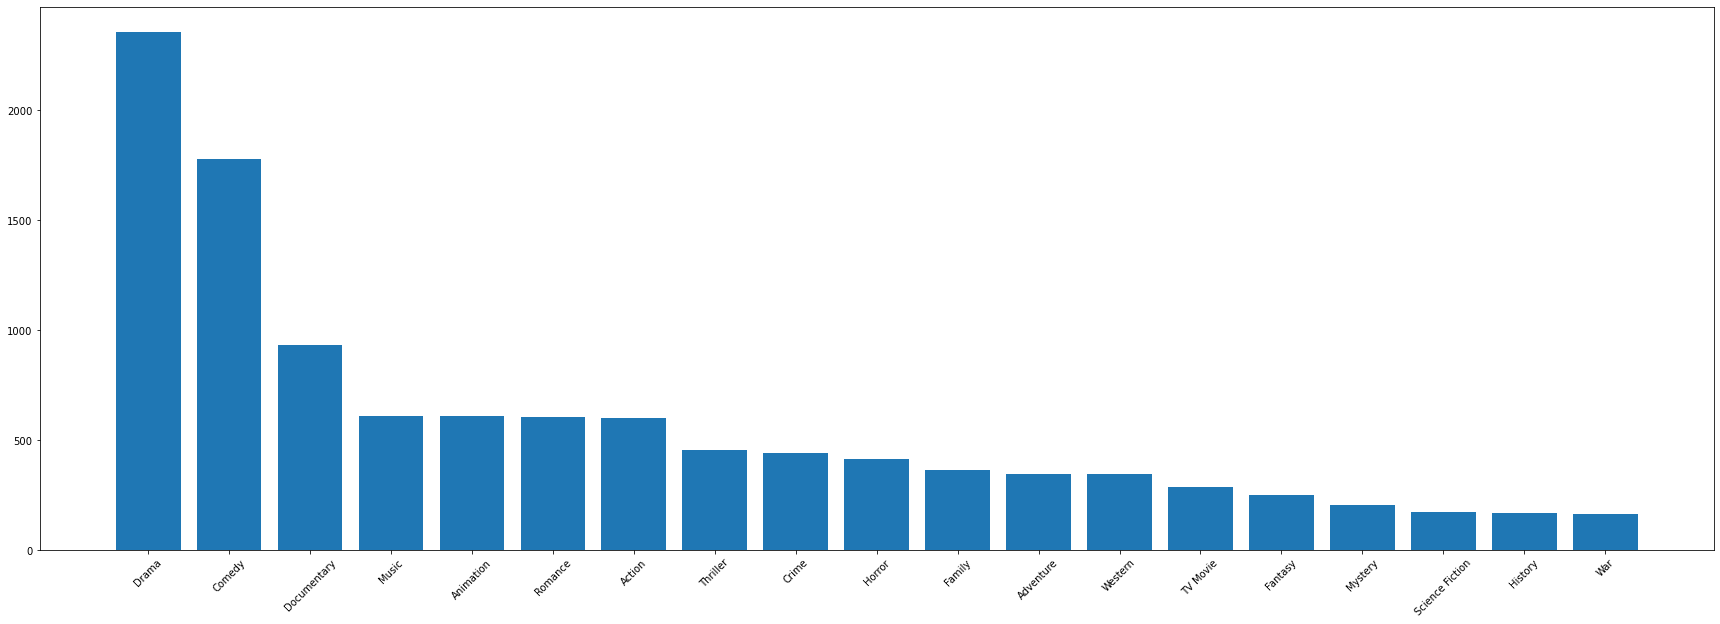

In [530]:
plt.figure(figsize=(30,10)) 
plt.bar(top30_separateClass.class_,top30_separateClass.name)
plt.xticks(rotation=45) 

In [531]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore").fit(movie_gender_name[['name']])
ohe_class=pd.DataFrame(ohe.transform(movie_gender_name[['name']]),columns=ohe.get_feature_names())
movies_class = pd.concat([movie_gender_name, ohe_class], axis=1)


In [532]:
movies_class

,adult,id_x,original_title,popularity,video,url,poster_url,genre_id,id_y,name,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,28,28,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,141613,जीत,1.749,False,https://www.themoviedb.org/movie/141613,https://www.themoviedb.org/t/p/w500//jFMLxY4EA...,28,28,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,141634,Shadow Killers Tiger Force,1.150,False,https://www.themoviedb.org/movie/141634,https://www.themoviedb.org/t/p/w500//9CrW15MXs...,28,28,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,141643,10 Violent Women,2.874,False,https://www.themoviedb.org/movie/141643,https://www.themoviedb.org/t/p/w500//kAWgQ6woh...,28,28,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,141715,巨乳ハンター,0.656,False,https://www.themoviedb.org/movie/141715,https://www.themoviedb.org/t/p/w500//tRRS3dC3u...,28,28,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,False,162115,The Dummy,1.140,False,https://www.themoviedb.org/movie/162115,None,14,14,Fantasy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11092,False,162133,Bug Off!,4.745,False,https://www.themoviedb.org/movie/162133,None,14,14,Fantasy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11093,False,162139,Perri,3.272,False,https://www.themoviedb.org/movie/162139,https://www.themoviedb.org/t/p/w500//nUNz4oOUm...,14,14,Fantasy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11094,False,162580,Spooks,0.748,False,https://www.themoviedb.org/movie/162580,https://www.themoviedb.org/t/p/w500//tEKe6KxYo...,14,14,Fantasy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
